In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import networkx as nx

## Create 2D Lattice

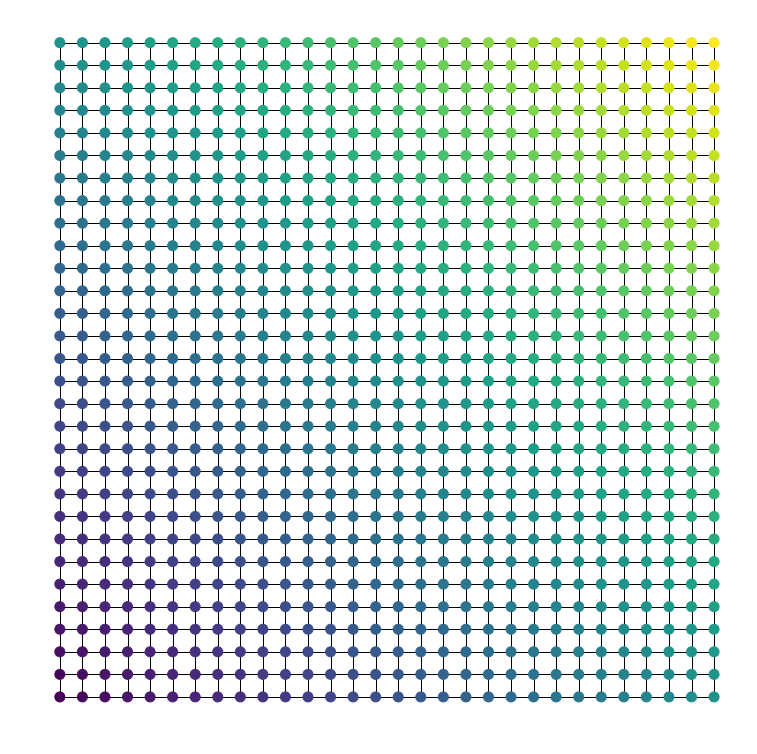

In [2]:
N = 30
G = nx.grid_2d_graph(N, N)
pos = {(i, j): (i, j) for i in range(N) for j in range(N)}
plt.figure(figsize=(10, 10))
node_color = np.array([x+y for x in range(N) for y in range(N)])
nx.draw(G, pos, node_size=100, node_color=node_color)
plt.show()

## Sparse Laplacian Function

In [3]:
def get_laplacian(G):
    A = scipy.sparse.lil_matrix((N*N, N*N), dtype=np.float32)
    D = np.zeros((N*N), dtype=np.float32)
    for e in G.edges():
        i = np.dot(e[0], (1, N))
        j = np.dot(e[1], (1, N))
        A[i, j] = A[j, i] = 1
        D[i] += 1
        D[j] += 1
    return np.diag(D) - A

## Get Eigen Vectors

In [4]:
laplacian = get_laplacian(G)
_, eigvec = scipy.sparse.linalg.eigsh(laplacian, k=20, which="SM")

## Plot top 20 Eigen Vectors onto Lattice

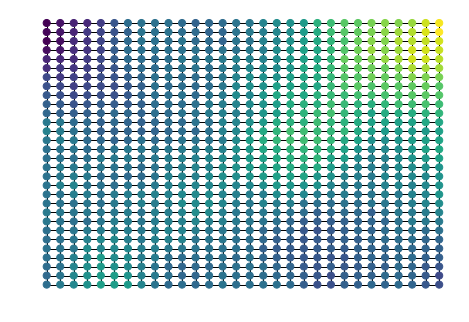

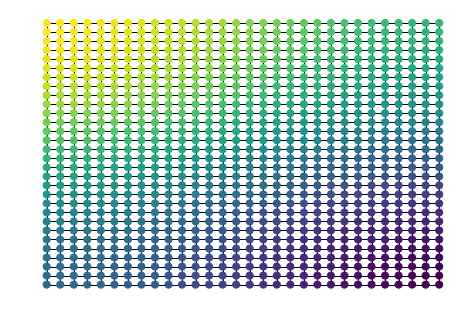

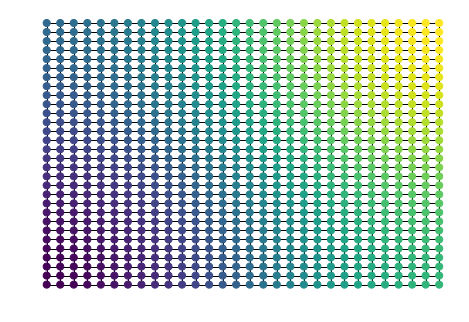

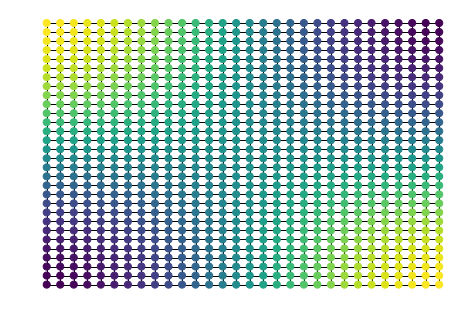

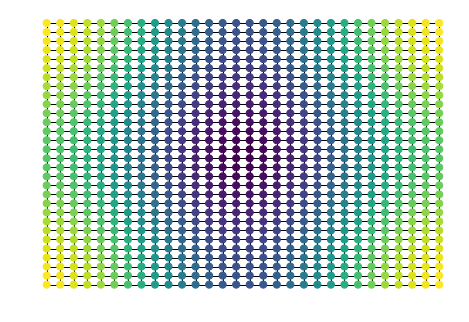

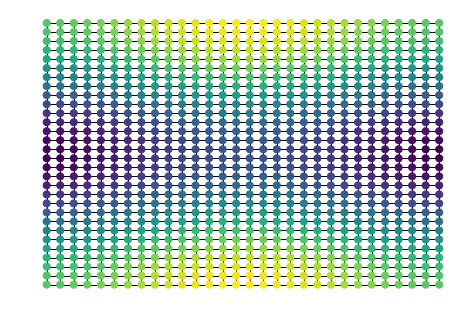

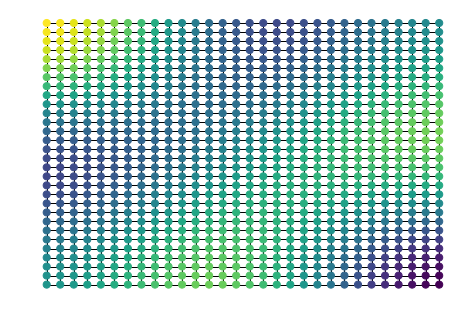

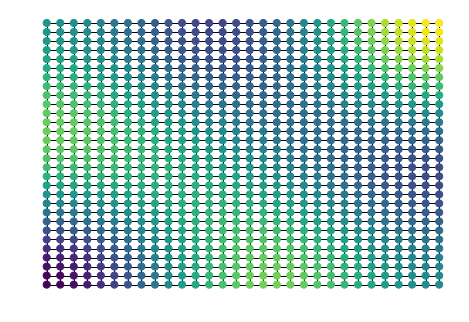

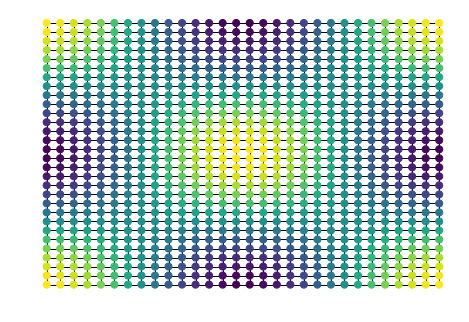

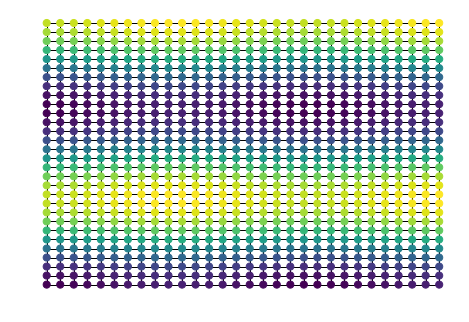

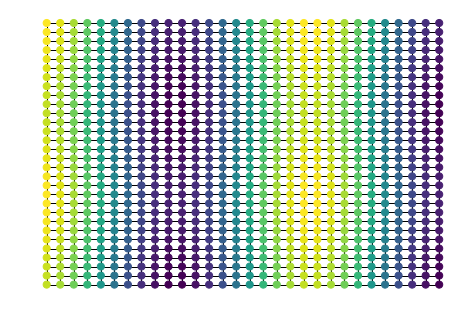

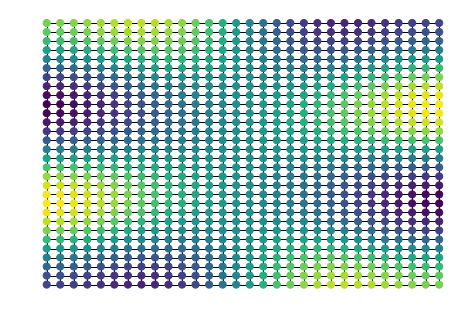

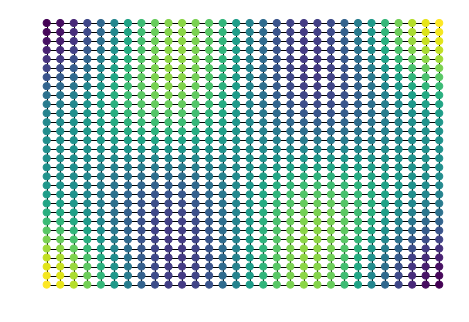

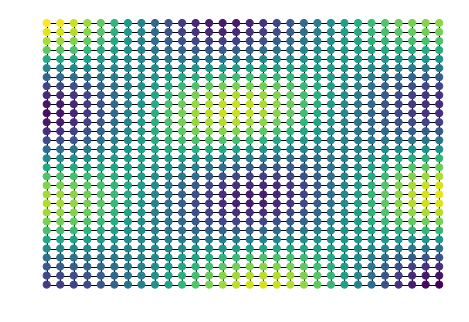

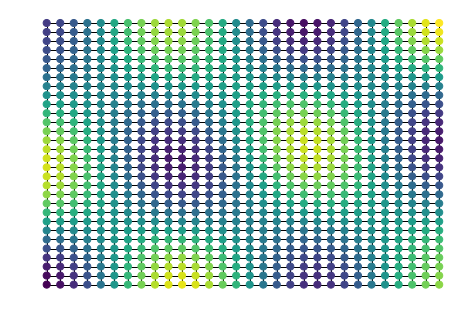

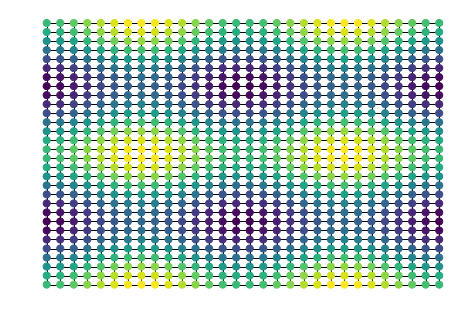

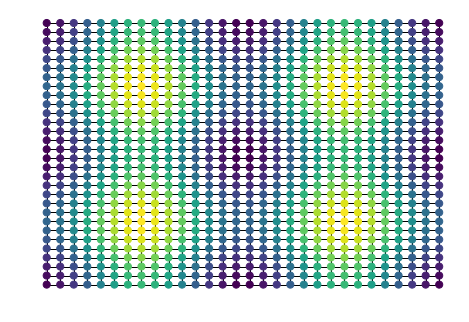

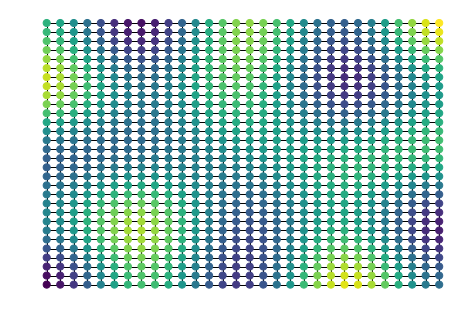

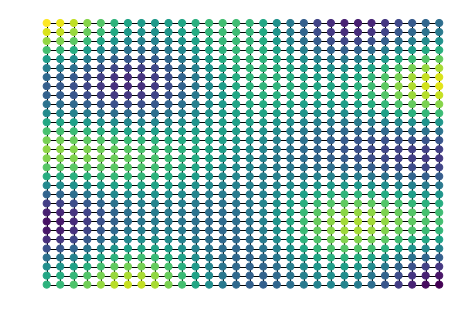

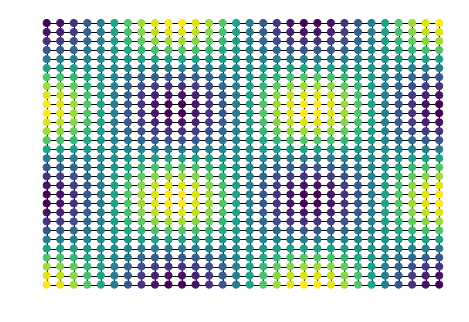

In [5]:
for i in range(20):
    G = nx.grid_2d_graph(N, N)
    nx.draw(G, pos, node_color=eigvec[:, i], node_size=50)
    plt.show()